In [1]:
using Revise, ReachabilityAnalysis, Plots, BenchmarkTools

In [2]:
# problem formulation
M = [2 0; 0 1.]
K = [6 -2; -2 4.]
C = zeros(2, 2)
R = [0, 10.]
sys = SecondOrderAffineContinuousSystem(M, C, K, R)

U₀ = zeros(2)
U₀′ = zeros(2);

In [27]:
prob = InitialValueProblem(sys, Singleton(U₀) × Singleton(U₀′));

@time sol1 = ReachabilityAnalysis.solve(prob, tspan=(0 .. 20), alg=GLGM06(δ=0.001, max_order=1));
@time sol2 = ReachabilityAnalysis.solve(prob, tspan=(0 .. 20), alg=GLGM06(δ=0.001, max_order=2));
@time sol3 = ReachabilityAnalysis.solve(prob, tspan=(0 .. 20), alg=GLGM06(δ=0.001, max_order=3));
@time sol4 = ReachabilityAnalysis.solve(prob, tspan=(0 .. 20), alg=GLGM06(δ=0.001, max_order=4));

  0.120922 seconds (432.38 k allocations: 55.232 MiB)
  0.068601 seconds (600.36 k allocations: 91.600 MiB)
  0.080397 seconds (600.34 k allocations: 105.023 MiB)
  0.092378 seconds (600.32 k allocations: 116.614 MiB)


┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /home/sguadalupe/.julia/dev/LazySets/src/Approximations/init.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /home/sguadalupe/.julia/packages/Revise/BqeJF/src/Revise.jl:820


┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /home/sguadalupe/.julia/dev/LazySets/src/Approximations/init.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /home/sguadalupe/.julia/packages/Revise/BqeJF/src/Revise.jl:820


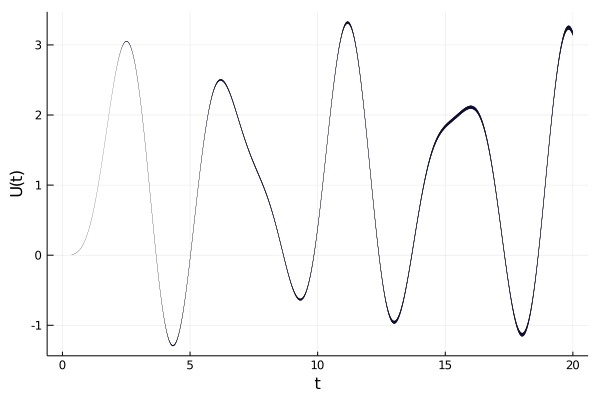

In [28]:
plot(sol4, vars=(0, 1), xlab="t", ylab="U(t)", lab="", color=:blue, lw=0.1, fmt=:png)

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /home/sguadalupe/.julia/dev/LazySets/src/Approximations/init.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /home/sguadalupe/.julia/packages/Revise/BqeJF/src/Revise.jl:820


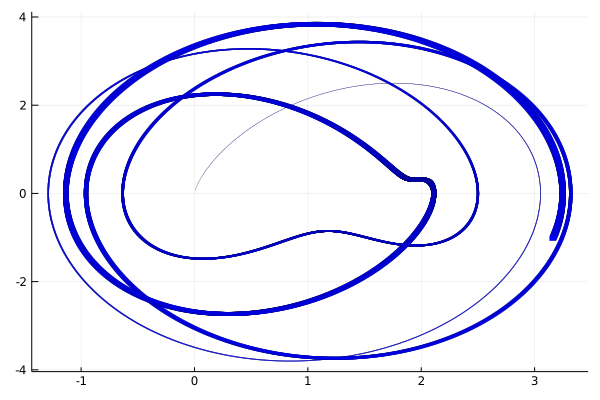

In [29]:
plot(sol4, vars=(1, 3), lab="", color=:blue, lw=0.1, fmt=:png)

In [6]:
function get_vertices(sol, vars=(1, 3))
    solproj = project(sol, vars)
    out = Vector{Vector{Vector{Float64}}}()
    for R in solproj
        v = vertices_list(set(R))
        push!(out, v)
    end
    return out
end

get_vertices (generic function with 2 methods)

In [7]:
numrsets(sol4)

20000

In [30]:
sols = [sol1, sol2, sol3, sol4];

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /home/sguadalupe/.julia/dev/LazySets/src/Approximations/init.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /home/sguadalupe/.julia/packages/Revise/BqeJF/src/Revise.jl:820


In [60]:
bench = []
for sol in sols
    t = @benchmark get_vertices(Flowpipe($sol[1:100])) seconds=10
    #t = minimum(t).time
    push!(bench, t)
end

In [67]:
t = @benchmark get_vertices(Flowpipe(sol4[1:100])) seconds=30

BenchmarkTools.Trial: 
  memory estimate:  12.58 GiB
  allocs estimate:  76328411
  --------------
  minimum time:     11.379 s (11.45% GC)
  median time:      11.641 s (9.89% GC)
  mean time:        11.638 s (10.25% GC)
  maximum time:     11.894 s (9.68% GC)
  --------------
  samples:          3
  evals/sample:     1

In [61]:
bench[4]

BenchmarkTools.Trial: 
  memory estimate:  12.58 GiB
  allocs estimate:  76328410
  --------------
  minimum time:     11.677 s (10.62% GC)
  median time:      11.677 s (10.62% GC)
  mean time:        11.677 s (10.62% GC)
  maximum time:     11.677 s (10.62% GC)
  --------------
  samples:          1
  evals/sample:     1

In [62]:
bench2[4]

BenchmarkTools.Trial: 
  memory estimate:  139.05 MiB
  allocs estimate:  833005
  --------------
  minimum time:     100.175 ms (8.61% GC)
  median time:      121.598 ms (9.32% GC)
  mean time:        122.878 ms (9.27% GC)
  maximum time:     136.410 ms (10.85% GC)
  --------------
  samples:          81
  evals/sample:     1

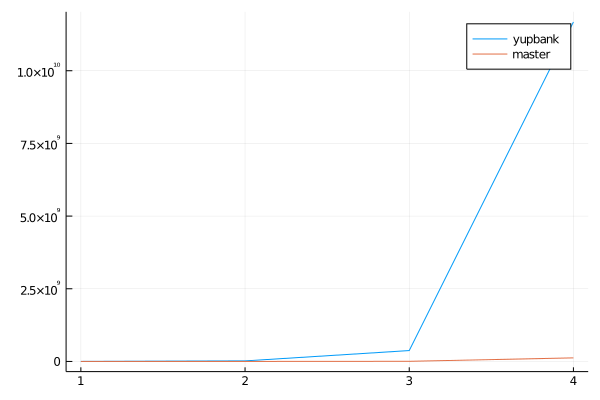

In [68]:
plot(time.(mean.(bench)), label="yupbank")
plot!(time.(mean.(bench2)), label="master")

In [25]:
@time out = get_vertices(Flowpipe(sol6[1:10]));

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /home/sguadalupe/.julia/dev/LazySets/src/Approximations/init.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /home/sguadalupe/.julia/packages/Revise/BqeJF/src/Revise.jl:820


LoadError: InterruptException:

In [13]:
@time [vertices_list(project(set(R), (1, 3))) for R in sol[1:10]];

  0.054982 seconds (209.33 k allocations: 25.588 MiB)


In [18]:
[order(set(R)) for R in sol4[1:10]]

10-element Array{Rational{Int64},1}:
 1//1
 2//1
 3//1
 4//1
 4//1
 4//1
 4//1
 4//1
 4//1
 4//1

In [17]:
@time out = get_vertices(Flowpipe(sol[1:1000]));

  0.132436 seconds (900.51 k allocations: 150.073 MiB)


# Yupbank

In [12]:
@time out = get_vertices(Flowpipe(sol[1:10]));

  0.138929 seconds (826.25 k allocations: 137.942 MiB, 9.57% gc time)


In [13]:
@time [vertices_list(project(set(R), (1, 3))) for R in sol[1:10]];

  0.054982 seconds (209.33 k allocations: 25.588 MiB)


In [ ]:
@time out = get_vertices(Flowpipe(sol[1:20000]));